In [1]:
import scipy as scipy
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16}) # The default font in LaTex
# font.family        : serif
# font.serif         : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
# font.sans-serif    : Helvetica, Avant Garde, Computer Modern Sans serif
# font.cursive       : Zapf Chancery
# font.monospace     : Courier, Computer Modern Typewriter
# text.usetex        : true
plt.rc('text', usetex=True)

In [2]:
theta = 0.1
scale = 8/(theta**2)

In [3]:
dataEC = np.loadtxt('Data_CollectiveEncoded2_20_10_10000.txt', delimiter='\t', unpack = True)
dataMS = np.loadtxt('Data_CollectiveGHZ2_20_10_10000.txt', delimiter='\t', unpack = True)
dataF  = np.loadtxt('DataNE_Collective.txt', delimiter='\t', unpack = True)

# Setting lower bound for trajectories to be zero as infidelity cannot be negative
llEn = [max(dataEC[1][i]-dataEC[2][i],0) for i in range(len(dataEC[0]))]
llEc = [max(dataEC[3][i]-dataEC[4][i],0) for i in range(len(dataEC[0]))]
llMS = [max(dataEC[1][i]-dataEC[2][i],0) for i in range(len(dataMS[0]))]

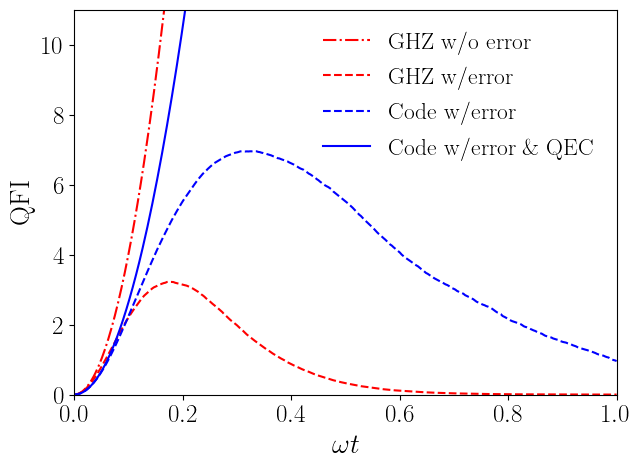

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(dataF[0],scale*dataF[1],color='red',linestyle='dashdot',label=r'GHZ w/o error')

ax.plot(dataMS[0],scale*dataMS[1],color='red',linestyle='dashed',label=r'GHZ w/error')
#ax.fill_between(dataMS[0], llMS, dataMS[1]+dataMS[2], facecolor='red', alpha = 0.4)

ax.plot(dataEC[0],scale*dataEC[1],color='blue',linestyle='dashed',label=r'Code w/error')
#ax.fill_between(dataEC[0], llEn, dataEC[1]+dataEC[2], facecolor='blue', alpha = 0.3)

ax.plot(dataEC[0],scale*dataEC[3],color='blue',linestyle='solid',label=r'Code w/error \& QEC')
#ax.fill_between(dataEC[0], llEc, dataEC[3]+dataEC[4], facecolor='green', alpha = 0.2)

ax.set_xlim((0,1))
#ax.set_yticks([0,1e-2,2e-2,3e-2,4e-2])
ax.set_ylim((0,11))
ax.set_xlabel(r'$\omega t$',fontsize=20,labelpad=5)
ax.set_ylabel(r'QFI',fontsize=20,labelpad=5)

plt.legend(fontsize = 17, loc='best',frameon=False)
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


#plt.title(r'$N = {}, J = {}, \Delta ~T = 0.01, ~ \gamma_{{\downarrow}}$ = {}'.format(N,J,dr))
plt.savefig("Collective_QFI.pdf",bbox_inches='tight',dpi=600)
plt.show()